### This is the classic Titanic dataset. The data consists of demographic and traveling information for 418 of the Titanic passengers, and the goal is to predict the survival of these passengers.This dataset contains information about general information and detail of each passengers.


**Pclass:** Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
**Survival:** A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); This is our target.
**Name:** A field rich in information as it contains title and family names
**Sex:** male/female
**Age:** Age, asignificant portion of values aremissing
**Sibsp:** Number of siblings/spouses aboard
**Parch:** Number of parents/children aboard
**Ticket:** Ticket number.
**Fare:** Passenger fare (in British Pound).
**Cabin:** Doesthe location of the cabin influence chances of survival?
**Embarked:** Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Author:** Muhammad Faique

[My LinkedIn](https://linkedin.com/in/muhammad-faique-b21775226)

In [205]:
# First we import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [206]:
df = pd.read_csv('./tested.csv')

In [207]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [208]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
182,1074,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S
286,1178,0,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
216,1108,1,3,"Mahon, Miss. Bridget Delia",female,NaN,0,0,330924,7.8792,NaN,Q
191,1083,0,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S


### **Data Preprocessing**

In [209]:
df.drop_duplicates(inplace=True)

In [210]:
median_age = df['Age'].median()
mode_embarked = df['Embarked'].mode()[0]

#the [0] at the end of the line...
#...means that we are accessing the first element of the pd or pandas series returned by the mode() function.

df['Age'].fillna(median_age, inplace=True) #here fillna fills the missing values
df['Embarked'].fillna(mode_embarked, inplace=True)

This is the summary of dataset variables, identification of missing values, and initial insights

In [211]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [212]:
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [213]:
#We can also remove
#the Cabin column as it has a large number of missing values
#and it is also not essential for analysis.
df.drop('Cabin', axis=1, inplace=True)

In [214]:
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [215]:
#Checking outliers

#### **Checking & Removing outliers (if any)**

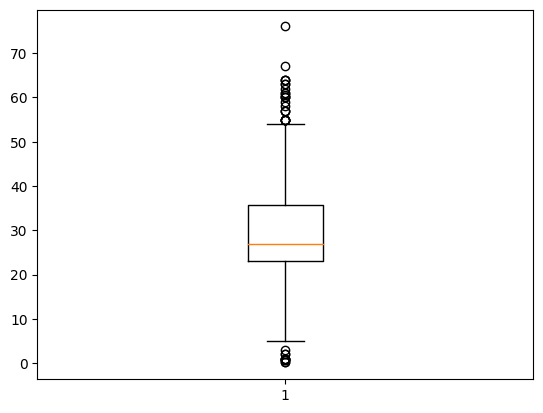

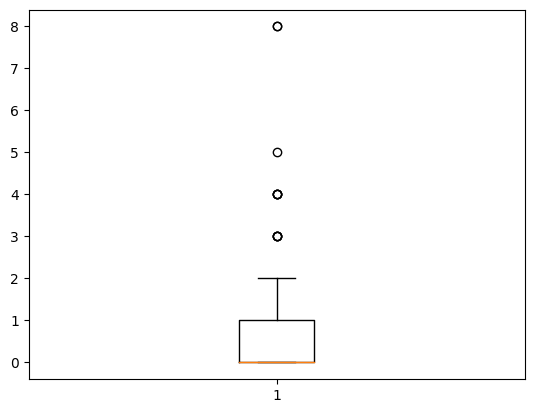

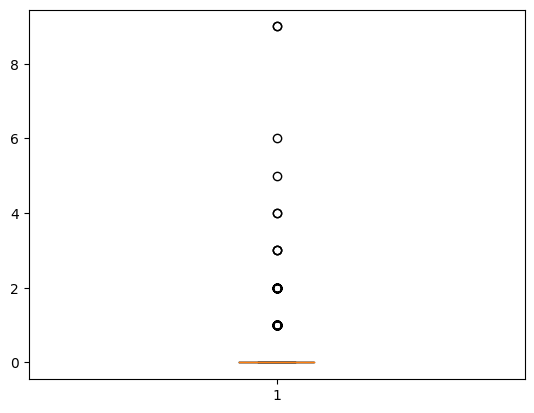

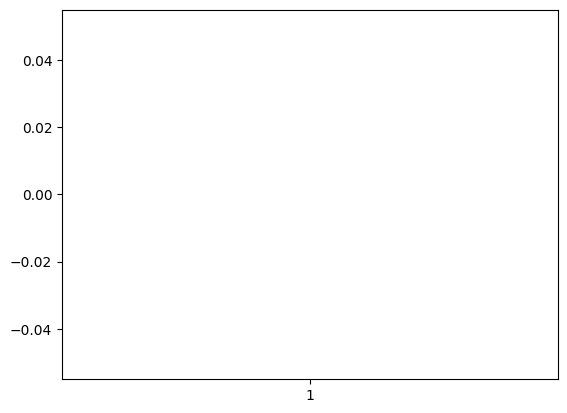

In [216]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.show()

plt.boxplot(df['SibSp'])
plt.show()

plt.boxplot(df['Parch'])
plt.show()

plt.boxplot(df['Fare'])
plt.show()

In [217]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'Fare')

In [218]:
#Normalizing or standardizing the numerical features

df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df['Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

<ipython-input-218-7f400d6faa1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
<ipython-input-218-7f400d6faa1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())


In [219]:
#Encoding categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [220]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",0.537835,0,0,330911,0.120449,0,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0.733668,1,0,363272,0.107692,1,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0.968667,0,0,240276,0.149038,0,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",0.420335,0,0,315154,0.133269,0,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.342002,1,1,3101298,0.189038,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",0.436002,0,0,347086,0.119615,1,0,0,0,1
413,1305,0,3,"Spector, Mr. Woolf",0.420335,0,0,A.5. 3236,0.123846,0,1,0,0,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0.600501,0,0,SOTON/O.Q. 3101262,0.111538,0,1,0,0,1
416,1308,0,3,"Ware, Mr. Frederick",0.420335,0,0,359309,0.123846,0,1,0,0,1


### **Data Visualization**

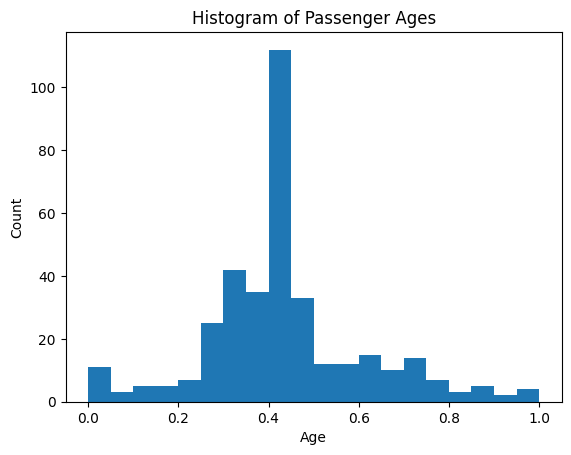

In [221]:
#Histogram Plot
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Passenger Ages')
plt.show()

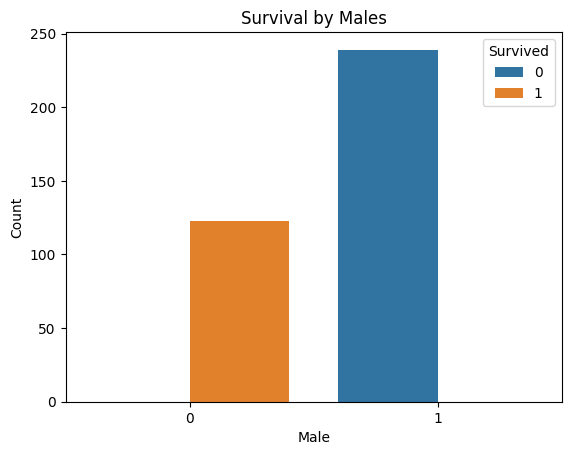

In [222]:
#Bar Chart Plot
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.xlabel('Male')
plt.ylabel('Count')
plt.title('Survival by Males')
plt.show()

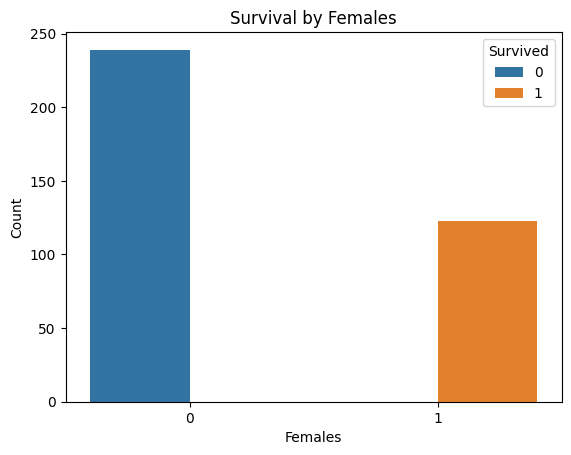

In [223]:
#Bar Chart Plot for females surivals
sns.countplot(x='Sex_female', hue='Survived', data=df)
plt.xlabel('Females')
plt.ylabel('Count')
plt.title('Survival by Females')
plt.show()

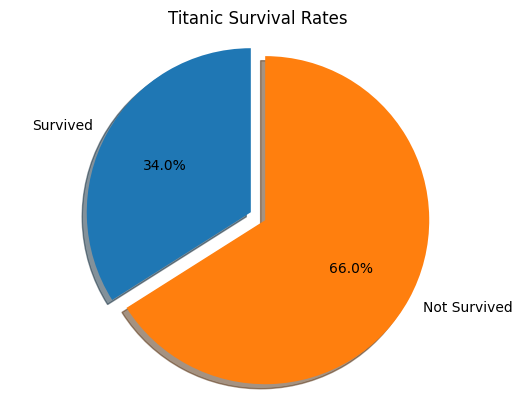

In [224]:
# Count survived and not survived
survived = df[df['Survived']==1].shape[0]
not_survived = df[df['Survived']==0].shape[0]

# Labels and sizes
labels = ['Survived', 'Not Survived']
sizes = [survived, not_survived]

# Draw pie plot
plt.pie(sizes, labels=labels, shadow=True, explode=(0, 0.1),
       autopct='%1.1f%%', startangle=90)

plt.title('Titanic Survival Rates')
plt.axis('equal')

plt.show()

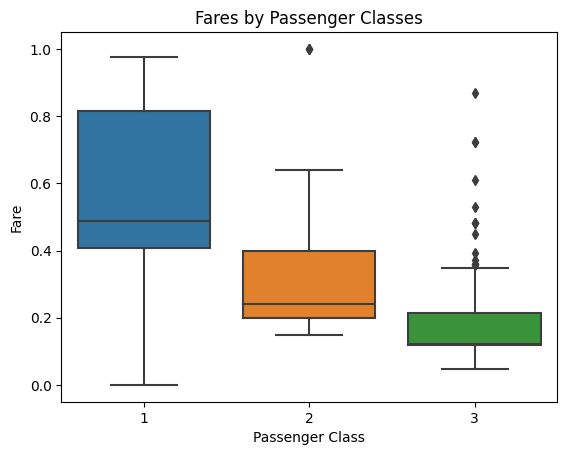

In [225]:
#Box Plot
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Fares by Passenger Classes')
plt.show()

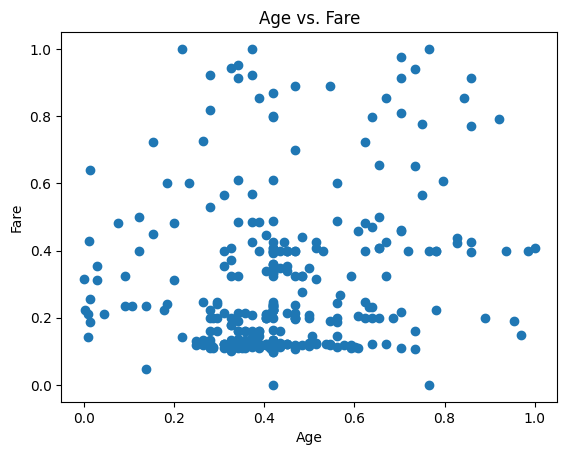

In [226]:
#Scatter Plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

<ipython-input-227-47110b04768c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


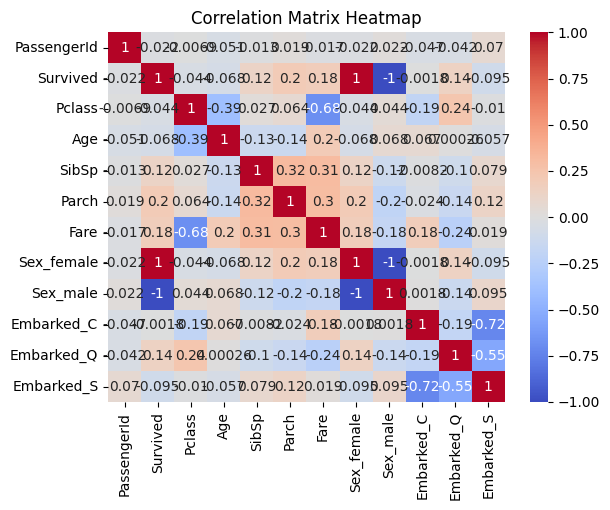

In [227]:
#This is the HeatMap of Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

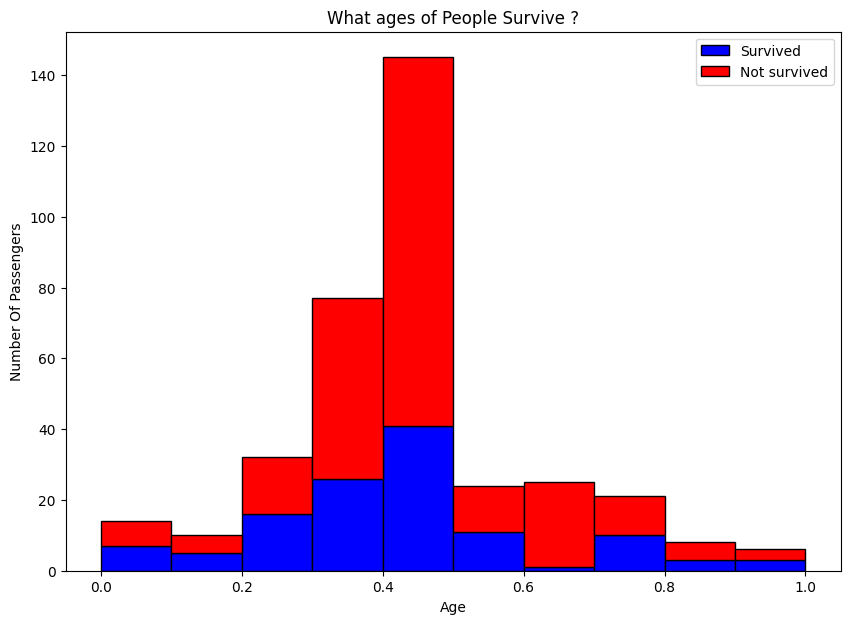

In [228]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['b','r',],edgecolor='k',label = ['Survived','Not survived'])
plt.title('What ages of People Survive ?')
plt.xlabel('Age')
plt.ylabel('Number Of Passengers')
plt.legend()

In [229]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",0.537835,0,0,330911,0.120449,0,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0.733668,1,0,363272,0.107692,1,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0.968667,0,0,240276,0.149038,0,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",0.420335,0,0,315154,0.133269,0,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.342002,1,1,3101298,0.189038,1,0,0,0,1


In [230]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,1097.046961,0.339779,2.428177,0.434487,0.378453,0.303867,0.280950,0.339779,0.660221,0.196133,0.124309,0.679558
std,120.984789,0.474290,0.752894,0.175797,0.739004,0.737921,0.221059,0.474290,0.474290,0.397620,0.330391,0.467292
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,993.250000,0.000000,2.000000,0.342002,0.000000,0.000000,0.120834,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1096.500000,0.000000,3.000000,0.420335,0.000000,0.000000,0.200000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1200.500000,1.000000,3.000000,0.483002,1.000000,0.000000,0.400000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Applying the Model**

The Reason we use Logistic regression is because the task is to classify passengers as survived or did not survive, which is a binary classification problem. Logistic regression is well-suited ML model for binary classification.

In [231]:
# Separate into features and target columns
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Survived is the target
y = df['Survived']

In [232]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
# Fit a LogisticRegression model
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [234]:
y_pred = LR.predict(X_test)

In [235]:
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy:', LRAcc*100)

Logistic regression accuracy: 100.0


In [236]:
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 100.00%


In [237]:
# Evaluate model performance , or predictions
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy: ', accuracy)

Accuracy:  1.0


In [238]:
# Calculate the R2 score for our model
r2 = r2_score(y_pred,y_test)
print('R2 score: ', r2)

R2 score:  1.0


In [239]:
scores = cross_val_score(LR, X, y, cv=10)

print("Cross-validation scores: ", scores)

print("Average cross-validation score: {:.2f}".format(np.mean(scores)))

Cross-validation scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average cross-validation score: 1.00


In [240]:
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        23

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [241]:
scores = cross_val_score(LR, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [242]:
X_train, y_train = X[:150], y[:150]
X_test, y_test = X[150:], y[150:]

LR.fit(X_train, y_train)
print(LR.score(X_test, y_test))

1.0


### **Testing on Unseen Data**

In [243]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
113,1005,1,3,"Buckley, Miss. Katherine",0.287169,0,0,329944,0.112051,1,0,0,1,0
398,1290,0,3,"Larsson-Rondberg, Mr. Edvard A",0.342002,0,0,347065,0.119615,0,1,0,0,1
62,954,0,3,"Bjorklund, Mr. Ernst Herbert",0.279336,0,0,347090,0.119231,0,1,0,0,1
23,915,0,1,"Williams, Mr. Richard Norris II",0.326336,0,1,PC 17597,0.944295,0,1,1,0,0


In [244]:
# Generate new unseen data
X_new = pd.DataFrame({'Pclass': [3],
                       'Age': [35],
                       'SibSp': [1],
                       'Parch': [0],
                       'Fare': [500],
                       'Sex_female': [0],
                       'Sex_male': [1],
                       'Embarked_C': [0],
                       'Embarked_Q': [0],
                       'Embarked_S': [1]})

# Now Predict
y_pred = LR.predict(X_new)

print(y_pred)

[1]


In [245]:
X_new = pd.DataFrame({'Pclass': [3],
                       'Age': [25],
                       'SibSp': [1],
                       'Parch': [0],
                       'Fare': [100],
                       'Sex_female': [0],
                       'Sex_male': [1],
                       'Embarked_C': [0],
                       'Embarked_Q': [0],
                       'Embarked_S': [1]})

# Now Predict
y_pred = LR.predict(X_new)

print(y_pred)

[0]
